In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from hmmlearn.hmm import GaussianHMM
from hmmlearn.hmm import MultinomialHMM
import matplotlib.pyplot as plt

In [2]:
#preparing the data

In [3]:
df=pd.read_csv('Original_Dataset.csv')

In [4]:
a1=df.loc[:,["LC_X" in i for i in df.columns]]


In [5]:
a2=df.loc[:,["LC_Y" in i for i in df.columns]]

In [6]:
a3=df.loc[:,["RC_X" in i for i in df.columns]]

In [7]:
a4=df.loc[:,["RC_Y" in i for i in df.columns]]

In [8]:
combined = np.dstack((a1, a2, a3, a4))

In [9]:
len(combined)

350

In [10]:
np.any(np.isnan(combined))

False

In [11]:
#Normalizing the data

In [12]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [13]:
combined = NormalizeData(combined)

combined

array([[[0.61033797, 0.35984095, 0.        , 0.        ],
        [0.77335984, 0.3916501 , 0.        , 0.        ],
        [0.51491054, 0.37972167, 0.77335984, 0.3916501 ],
        ...,
        [0.41153082, 0.3638171 , 0.88667992, 0.38170974],
        [0.4055666 , 0.3638171 , 0.88866799, 0.38568588],
        [0.40159046, 0.3638171 , 0.90059642, 0.38369781]],

       [[0.67594433, 0.34592445, 0.7693837 , 0.35785288],
        [0.67594433, 0.34791252, 0.7693837 , 0.35984095],
        [0.67594433, 0.3499006 , 0.76739563, 0.36182903],
        ...,
        [0.46719682, 0.35188867, 0.81908549, 0.35586481],
        [0.46520875, 0.35188867, 0.82107356, 0.35586481],
        [0.46322068, 0.3499006 , 0.8250497 , 0.35387674]],

       [[0.51689861, 0.35387674, 0.7972167 , 0.39761431],
        [0.52286282, 0.35586481, 0.80516899, 0.39960239],
        [0.52882704, 0.35387674, 0.80914513, 0.39960239],
        ...,
        [0.47117296, 0.35984095, 0.8528827 , 0.36978131],
        [0.46520875, 0.359840

In [14]:
combined.shape

(350, 30, 4)

In [15]:
#Building the model

In [16]:
model_1=combined[0:50]
model_2=combined[50:100]
model_3=combined[100:150]
model_4=combined[150:200]
model_5=combined[200:250]
model_6=combined[250:300]
model_7=combined[300:350]

In [17]:
model1_train,model1_test=train_test_split(model_1,test_size=0.2)
model2_train,model2_test=train_test_split(model_2,test_size=0.2)
model3_train,model3_test=train_test_split(model_3,test_size=0.2)
model4_train,model4_test=train_test_split(model_4,test_size=0.2)
model5_train,model5_test=train_test_split(model_5,test_size=0.2)
model6_train,model6_test=train_test_split(model_6,test_size=0.2)
model7_train,model7_test=train_test_split(model_7,test_size=0.2)

In [59]:
model1 = GaussianHMM(n_components=2)
model2 = GaussianHMM(n_components=2)
model3 = GaussianHMM(n_components=2)
model4 = GaussianHMM(n_components=2)
model5 = GaussianHMM(n_components=2)
model6 = GaussianHMM(n_components=2)
model7 = GaussianHMM(n_components=2)

In [60]:
concat_test=np.concatenate((model1_test,model2_test,model3_test,model4_test,model5_test,model6_test,model7_test))

In [61]:
concat_test.shape

(70, 30, 4)

In [62]:
model1.fit(model1_train.reshape(-1,4),lengths=30)
model2.fit(model2_train.reshape(-1,4),lengths=30)
model3.fit(model3_train.reshape(-1,4),lengths=30)
model4.fit(model4_train.reshape(-1,4),lengths=30)
model5.fit(model5_train.reshape(-1,4),lengths=30)
model6.fit(model6_train.reshape(-1,4),lengths=30)
model7.fit(model7_train.reshape(-1,4),lengths=30)

C:\Users\Kiran\anaconda3\envs\cse6363\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: less that 1200 samples in lengths array 30; support for silently dropping samples is deprecated and will be removed
  """Entry point for launching an IPython kernel.
C:\Users\Kiran\anaconda3\envs\cse6363\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: less that 1200 samples in lengths array 30; support for silently dropping samples is deprecated and will be removed
  
C:\Users\Kiran\anaconda3\envs\cse6363\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: less that 1200 samples in lengths array 30; support for silently dropping samples is deprecated and will be removed
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Kiran\anaconda3\envs\cse6363\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: less that 1200 samples in lengths array 30; support for silently dropping samples is deprecated and will be remov

GaussianHMM(n_components=2)

In [63]:
models=[model1,model2,model3,model4,model5,model6,model7]


In [64]:
dc={0:'ZoomIn',1:'ZoomOut',2:'MoveLeft',3:'MoveRight',4:'MoveDown',5:'MoveUp',6:'Press'}
succ=0
for ind,i in enumerate(concat_test):
    max_model=float('-inf')
    max_score=float('-inf')
    for index,j in enumerate(models):
        if j.score(i) > max_score:
            max_score=j.score(i)
            max_model=index
            
            
    if(ind<10):
        if(max_model==0):
            succ+=1
            
    elif(ind>=10 and ind<20):
        if(max_model==1):
            succ+=1
            
    elif(ind>=20 and ind<30):
        if(max_model==2):
            succ+=1
            
    elif(ind>=30 and ind<40):
        if(max_model==3):
            succ+=1
            
    elif(ind>=40 and ind<50):
        if(max_model==4):
            succ+=1
            
    elif(ind>=50 and ind<60):
        if(max_model==5):
            succ+=1
            
    elif(ind>=60 and ind<70):
        if(max_model==6):
            succ+=1
        
    print('test sample',ind+1,' belongs to gesture:',dc[max_model])
    
    
    
    


test sample 1  belongs to gesture: ZoomIn
test sample 2  belongs to gesture: ZoomIn
test sample 3  belongs to gesture: ZoomIn
test sample 4  belongs to gesture: ZoomIn
test sample 5  belongs to gesture: ZoomIn
test sample 6  belongs to gesture: ZoomIn
test sample 7  belongs to gesture: ZoomIn
test sample 8  belongs to gesture: ZoomIn
test sample 9  belongs to gesture: ZoomIn
test sample 10  belongs to gesture: ZoomIn
test sample 11  belongs to gesture: ZoomOut
test sample 12  belongs to gesture: ZoomIn
test sample 13  belongs to gesture: ZoomOut
test sample 14  belongs to gesture: ZoomIn
test sample 15  belongs to gesture: ZoomOut
test sample 16  belongs to gesture: ZoomOut
test sample 17  belongs to gesture: ZoomOut
test sample 18  belongs to gesture: ZoomOut
test sample 19  belongs to gesture: ZoomOut
test sample 20  belongs to gesture: ZoomOut
test sample 21  belongs to gesture: MoveLeft
test sample 22  belongs to gesture: MoveRight
test sample 23  belongs to gesture: MoveRight
test

In [65]:
print('The number of successes:',succ)
print('The accuracy of prediction when number of components=2 is',succ/70*100)

The number of successes: 43
The accuracy of prediction when number of components=2 is 61.42857142857143


In [66]:
#finding the best configuration
#with number of components=3

In [67]:
model1 = GaussianHMM(n_components=3)
model2 = GaussianHMM(n_components=3)
model3 = GaussianHMM(n_components=3)
model4 = GaussianHMM(n_components=3)
model5 = GaussianHMM(n_components=3)
model6 = GaussianHMM(n_components=3)
model7 = GaussianHMM(n_components=3)

In [68]:
model1.fit(model1_train.reshape(-1,4),lengths=30)
model2.fit(model2_train.reshape(-1,4),lengths=30)
model3.fit(model3_train.reshape(-1,4),lengths=30)
model4.fit(model4_train.reshape(-1,4),lengths=30)
model5.fit(model5_train.reshape(-1,4),lengths=30)
model6.fit(model6_train.reshape(-1,4),lengths=30)
model7.fit(model7_train.reshape(-1,4),lengths=30)

C:\Users\Kiran\anaconda3\envs\cse6363\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: less that 1200 samples in lengths array 30; support for silently dropping samples is deprecated and will be removed
  """Entry point for launching an IPython kernel.
C:\Users\Kiran\anaconda3\envs\cse6363\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: less that 1200 samples in lengths array 30; support for silently dropping samples is deprecated and will be removed
  
C:\Users\Kiran\anaconda3\envs\cse6363\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: less that 1200 samples in lengths array 30; support for silently dropping samples is deprecated and will be removed
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Kiran\anaconda3\envs\cse6363\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: less that 1200 samples in lengths array 30; support for silently dropping samples is deprecated and will be remov

GaussianHMM(n_components=3)

In [69]:
models=[model1,model2,model3,model4,model5,model6,model7]

In [70]:
dc={0:'ZoomIn',1:'ZoomOut',2:'MoveLeft',3:'MoveRight',4:'MoveDown',5:'MoveUp',6:'Press'}
succ=0
for ind,i in enumerate(concat_test):
    max_model=float('-inf')
    max_score=float('-inf')
    for index,j in enumerate(models):
        if j.score(i) > max_score:
            max_score=j.score(i)
            max_model=index
            
            
    if(ind<10):
        if(max_model==0):
            succ+=1
            
    elif(ind>=10 and ind<20):
        if(max_model==1):
            succ+=1
            
    elif(ind>=20 and ind<30):
        if(max_model==2):
            succ+=1
            
    elif(ind>=30 and ind<40):
        if(max_model==3):
            succ+=1
            
    elif(ind>=40 and ind<50):
        if(max_model==4):
            succ+=1
            
    elif(ind>=50 and ind<60):
        if(max_model==5):
            succ+=1
            
    elif(ind>=60 and ind<70):
        if(max_model==6):
            succ+=1
        
    print('test sample',ind+1,' belongs to gesture:',dc[max_model])

test sample 1  belongs to gesture: ZoomIn
test sample 2  belongs to gesture: ZoomIn
test sample 3  belongs to gesture: ZoomIn
test sample 4  belongs to gesture: ZoomIn
test sample 5  belongs to gesture: ZoomIn
test sample 6  belongs to gesture: ZoomIn
test sample 7  belongs to gesture: ZoomIn
test sample 8  belongs to gesture: ZoomIn
test sample 9  belongs to gesture: ZoomIn
test sample 10  belongs to gesture: ZoomIn
test sample 11  belongs to gesture: ZoomOut
test sample 12  belongs to gesture: ZoomIn
test sample 13  belongs to gesture: ZoomOut
test sample 14  belongs to gesture: ZoomIn
test sample 15  belongs to gesture: ZoomOut
test sample 16  belongs to gesture: ZoomOut
test sample 17  belongs to gesture: ZoomOut
test sample 18  belongs to gesture: ZoomOut
test sample 19  belongs to gesture: ZoomOut
test sample 20  belongs to gesture: ZoomOut
test sample 21  belongs to gesture: MoveLeft
test sample 22  belongs to gesture: MoveLeft
test sample 23  belongs to gesture: MoveRight
test 

In [71]:
print('The number of successes:',succ)
print('The accuracy of prediction with number of components=3 is',succ/70*100)

The number of successes: 49
The accuracy of prediction with number of components=3 is 70.0


In [72]:
#finding the best configuration
#with number of components=4
model1 = GaussianHMM(n_components=4)
model2 = GaussianHMM(n_components=4)
model3 = GaussianHMM(n_components=4)
model4 = GaussianHMM(n_components=4)
model5 = GaussianHMM(n_components=4)
model6 = GaussianHMM(n_components=4)
model7 = GaussianHMM(n_components=4)
models=[model1,model2,model3,model4,model5,model6,model7]
model1.fit(model1_train.reshape(-1,4),lengths=30)
model2.fit(model2_train.reshape(-1,4),lengths=30)
model3.fit(model3_train.reshape(-1,4),lengths=30)
model4.fit(model4_train.reshape(-1,4),lengths=30)
model5.fit(model5_train.reshape(-1,4),lengths=30)
model6.fit(model6_train.reshape(-1,4),lengths=30)
model7.fit(model7_train.reshape(-1,4),lengths=30)
c={0:'ZoomIn',1:'ZoomOut',2:'MoveLeft',3:'MoveRight',4:'MoveDown',5:'MoveUp',6:'Press'}
succ=0
for ind,i in enumerate(concat_test):
    max_model=float('-inf')
    max_score=float('-inf')
    for index,j in enumerate(models):
        if j.score(i) > max_score:
            max_score=j.score(i)
            max_model=index
            
            
    if(ind<10):
        if(max_model==0):
            succ+=1
            
    elif(ind>=10 and ind<20):
        if(max_model==1):
            succ+=1
            
    elif(ind>=20 and ind<30):
        if(max_model==2):
            succ+=1
            
    elif(ind>=30 and ind<40):
        if(max_model==3):
            succ+=1
            
    elif(ind>=40 and ind<50):
        if(max_model==4):
            succ+=1
            
    elif(ind>=50 and ind<60):
        if(max_model==5):
            succ+=1
            
    elif(ind>=60 and ind<70):
        if(max_model==6):
            succ+=1
        
    print('test sample',ind+1,' belongs to gesture:',dc[max_model])

C:\Users\Kiran\anaconda3\envs\cse6363\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: less that 1200 samples in lengths array 30; support for silently dropping samples is deprecated and will be removed
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Kiran\anaconda3\envs\cse6363\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: less that 1200 samples in lengths array 30; support for silently dropping samples is deprecated and will be removed
  if sys.path[0] == '':
C:\Users\Kiran\anaconda3\envs\cse6363\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: less that 1200 samples in lengths array 30; support for silently dropping samples is deprecated and will be removed
  del sys.path[0]
C:\Users\Kiran\anaconda3\envs\cse6363\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: less that 1200 samples in lengths array 30; support for silently dropping samples is deprecated and will be removed
  
C:\Users\Kiran\anaconda3\

test sample 1  belongs to gesture: ZoomIn
test sample 2  belongs to gesture: ZoomIn
test sample 3  belongs to gesture: ZoomIn
test sample 4  belongs to gesture: ZoomIn
test sample 5  belongs to gesture: ZoomIn
test sample 6  belongs to gesture: ZoomIn
test sample 7  belongs to gesture: ZoomIn
test sample 8  belongs to gesture: ZoomIn
test sample 9  belongs to gesture: ZoomIn
test sample 10  belongs to gesture: ZoomIn
test sample 11  belongs to gesture: ZoomOut
test sample 12  belongs to gesture: ZoomIn
test sample 13  belongs to gesture: ZoomOut
test sample 14  belongs to gesture: ZoomIn
test sample 15  belongs to gesture: ZoomOut
test sample 16  belongs to gesture: ZoomOut
test sample 17  belongs to gesture: ZoomOut
test sample 18  belongs to gesture: ZoomOut
test sample 19  belongs to gesture: ZoomOut
test sample 20  belongs to gesture: ZoomOut
test sample 21  belongs to gesture: MoveLeft
test sample 22  belongs to gesture: MoveLeft
test sample 23  belongs to gesture: MoveRight
test 

In [73]:
print('The number of successes:',succ)
print('The accuracy of prediction with number of components=4',succ/70*100)

The number of successes: 49
The accuracy of prediction with number of components=4 70.0


In [74]:
#finding the best configuration
#with number of components=5
model1 = GaussianHMM(n_components=5)
model2 = GaussianHMM(n_components=5)
model3 = GaussianHMM(n_components=5)
model4 = GaussianHMM(n_components=5)
model5 = GaussianHMM(n_components=5)
model6 = GaussianHMM(n_components=5)
model7 = GaussianHMM(n_components=5)
models=[model1,model2,model3,model4,model5,model6,model7]
model1.fit(model1_train.reshape(-1,4),lengths=30)
model2.fit(model2_train.reshape(-1,4),lengths=30)
model3.fit(model3_train.reshape(-1,4),lengths=30)
model4.fit(model4_train.reshape(-1,4),lengths=30)
model5.fit(model5_train.reshape(-1,4),lengths=30)
model6.fit(model6_train.reshape(-1,4),lengths=30)
model7.fit(model7_train.reshape(-1,4),lengths=30)
c={0:'ZoomIn',1:'ZoomOut',2:'MoveLeft',3:'MoveRight',4:'MoveDown',5:'MoveUp',6:'Press'}
succ=0
for ind,i in enumerate(concat_test):
    max_model=float('-inf')
    max_score=float('-inf')
    for index,j in enumerate(models):
        if j.score(i) > max_score:
            max_score=j.score(i)
            max_model=index
            
            
    if(ind<10):
        if(max_model==0):
            succ+=1
            
    elif(ind>=10 and ind<20):
        if(max_model==1):
            succ+=1
            
    elif(ind>=20 and ind<30):
        if(max_model==2):
            succ+=1
            
    elif(ind>=30 and ind<40):
        if(max_model==3):
            succ+=1
            
    elif(ind>=40 and ind<50):
        if(max_model==4):
            succ+=1
            
    elif(ind>=50 and ind<60):
        if(max_model==5):
            succ+=1
            
    elif(ind>=60 and ind<70):
        if(max_model==6):
            succ+=1
        
    print('test sample',ind+1,' belongs to gesture:',dc[max_model])

C:\Users\Kiran\anaconda3\envs\cse6363\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: less that 1200 samples in lengths array 30; support for silently dropping samples is deprecated and will be removed
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Kiran\anaconda3\envs\cse6363\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: less that 1200 samples in lengths array 30; support for silently dropping samples is deprecated and will be removed
  if sys.path[0] == '':
C:\Users\Kiran\anaconda3\envs\cse6363\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: less that 1200 samples in lengths array 30; support for silently dropping samples is deprecated and will be removed
  del sys.path[0]
C:\Users\Kiran\anaconda3\envs\cse6363\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: less that 1200 samples in lengths array 30; support for silently dropping samples is deprecated and will be removed
  
C:\Users\Kiran\anaconda3\

test sample 1  belongs to gesture: ZoomIn
test sample 2  belongs to gesture: ZoomIn
test sample 3  belongs to gesture: ZoomIn
test sample 4  belongs to gesture: ZoomIn
test sample 5  belongs to gesture: ZoomIn
test sample 6  belongs to gesture: ZoomIn
test sample 7  belongs to gesture: ZoomIn
test sample 8  belongs to gesture: ZoomIn
test sample 9  belongs to gesture: ZoomIn
test sample 10  belongs to gesture: ZoomIn
test sample 11  belongs to gesture: ZoomOut
test sample 12  belongs to gesture: ZoomIn
test sample 13  belongs to gesture: ZoomOut
test sample 14  belongs to gesture: ZoomIn
test sample 15  belongs to gesture: ZoomOut
test sample 16  belongs to gesture: ZoomOut
test sample 17  belongs to gesture: ZoomOut
test sample 18  belongs to gesture: ZoomOut
test sample 19  belongs to gesture: ZoomOut
test sample 20  belongs to gesture: ZoomOut
test sample 21  belongs to gesture: MoveLeft
test sample 22  belongs to gesture: MoveLeft
test sample 23  belongs to gesture: MoveRight
test 

In [75]:
print('The number of successes:',succ)
print('The accuracy of prediction with number of components=5',succ/70*100)

The number of successes: 49
The accuracy of prediction with number of components=5 70.0


In [35]:
#Sampling from the HMM

In [36]:
s_1=model1.sample(n_samples=10, random_state=None, currstate=None)

In [37]:
print('Sample generated')
print(s_1)

Sample generated
(array([[0.47280192, 0.36048622, 0.73038835, 0.37997217],
       [0.4844194 , 0.3596069 , 0.79407057, 0.36897502],
       [0.40795506, 0.35729832, 0.7261803 , 0.35052241],
       [0.42341726, 0.39874429, 0.74556424, 0.38404992],
       [0.44039927, 0.3885217 , 0.7774751 , 0.40938164],
       [0.41650603, 0.35470668, 0.71311107, 0.39257471],
       [0.45650326, 0.35876532, 0.7890013 , 0.35926557],
       [0.43940439, 0.37578171, 0.80552582, 0.41090017],
       [0.48393064, 0.36710989, 0.77902624, 0.40865484],
       [0.45593236, 0.33560078, 0.90311998, 0.38659735]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [38]:
print('Training data')

Training data


In [39]:
print(model1_train[0][:10])

[[0.47514911 0.36779324 0.72564612 0.37375746]
 [0.47316103 0.36580517 0.72763419 0.37375746]
 [0.47316103 0.36580517 0.72763419 0.37375746]
 [0.47316103 0.36580517 0.72564612 0.37574553]
 [0.47316103 0.36978131 0.72763419 0.37574553]
 [0.47514911 0.36978131 0.72365805 0.38369781]
 [0.47713718 0.37176938 0.72365805 0.37972167]
 [0.47713718 0.37176938 0.72365805 0.37972167]
 [0.47713718 0.37176938 0.72166998 0.38170974]
 [0.47713718 0.36978131 0.72365805 0.38170974]]


In [40]:
s_2=model2.sample(n_samples=10, random_state=None, currstate=None)

In [41]:
print('Sample generated')
print(s_2)

Sample generated
(array([[0.35504121, 0.38605896, 0.80148308, 0.4014357 ],
       [0.34420025, 0.39920063, 0.77042447, 0.42513067],
       [0.3629946 , 0.3871849 , 0.81993541, 0.43571114],
       [0.34694957, 0.38834559, 0.79689484, 0.40058136],
       [0.35418001, 0.40557597, 0.80312476, 0.40023417],
       [0.28289976, 0.38750918, 0.85167285, 0.41431349],
       [0.34055821, 0.3831918 , 0.81237469, 0.40217985],
       [0.34849413, 0.4275524 , 0.76942679, 0.44563264],
       [0.34746276, 0.39825751, 0.81685506, 0.40154303],
       [0.37907157, 0.36946359, 0.83344292, 0.45133848]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [42]:
print('Training data')
print(model2_train[0][:10])

Training data
[[0.31212724 0.39761431 0.84095427 0.42345924]
 [0.31212724 0.39761431 0.84294235 0.41749503]
 [0.31411531 0.39960239 0.84095427 0.42147117]
 [0.31610338 0.39761431 0.84095427 0.42147117]
 [0.31610338 0.39960239 0.83697813 0.42345924]
 [0.31610338 0.39960239 0.83499006 0.42544732]
 [0.31809145 0.40159046 0.83697813 0.42345924]
 [0.31809145 0.40357853 0.83697813 0.42147117]
 [0.31809145 0.40159046 0.83697813 0.4194831 ]
 [0.31809145 0.40357853 0.83697813 0.4194831 ]]


In [43]:
s_3=model3.sample(n_samples=40, random_state=None, currstate=None)

In [44]:
s_4=model4.sample(n_samples=40, random_state=None, currstate=None)

In [45]:
s_5=model5.sample(n_samples=40, random_state=None, currstate=None)

In [46]:
s_6=model6.sample(n_samples=40, random_state=None, currstate=None)

In [47]:
s_7=model7.sample(n_samples=40, random_state=None, currstate=None)

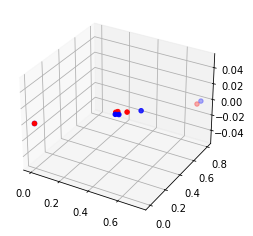

In [48]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
for i in range(len(s_1)):
    ax.scatter(s_1[i][0],s_1[i][1],c='b')
    ax.scatter(s_1[i][2],s_1[i][3],c='r')

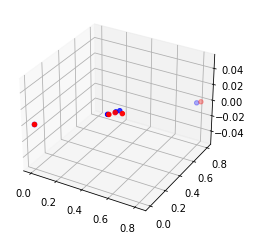

In [49]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
for i in range(len(s_2)):
    ax.scatter(s_2[i][0],s_2[i][1],c='b')
    ax.scatter(s_2[i][2],s_2[i][3],c='r')

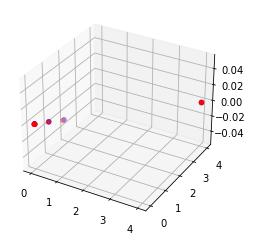

In [50]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
for i in range(len(s_3)):
    ax.scatter(s_3[i][0],s_3[i][1],c='b')
    ax.scatter(s_3[i][2],s_3[i][3],c='r')

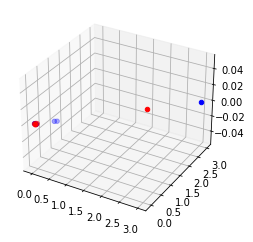

In [51]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
for i in range(len(s_4)):
    ax.scatter(s_4[i][0],s_4[i][1],c='b')
    ax.scatter(s_4[i][2],s_4[i][3],c='r')

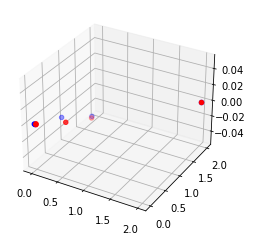

In [52]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
for i in range(len(s_5)):
    ax.scatter(s_5[i][0],s_5[i][1],c='b')
    ax.scatter(s_5[i][2],s_5[i][3],c='r')

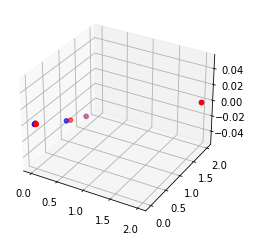

In [53]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
for i in range(len(s_6)):
    ax.scatter(s_6[i][0],s_6[i][1],c='b')
    ax.scatter(s_6[i][2],s_6[i][3],c='r')

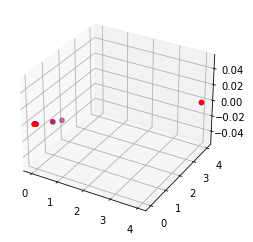

In [54]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
for i in range(len(s_7)):
    ax.scatter(s_7[i][0],s_7[i][1],c='b')
    ax.scatter(s_7[i][2],s_7[i][3],c='r')

In [55]:
model1.get_params()

{'algorithm': 'viterbi',
 'covariance_type': 'diag',
 'covars_prior': 0.01,
 'covars_weight': 1,
 'implementation': 'log',
 'init_params': 'stmc',
 'means_prior': 0,
 'means_weight': 0,
 'min_covar': 0.001,
 'n_components': 5,
 'n_iter': 10,
 'params': 'stmc',
 'random_state': None,
 'startprob_prior': 1.0,
 'tol': 0.01,
 'transmat_prior': 1.0,
 'verbose': False}

In [56]:
#forward algorithm

In [57]:
a=model1.transmat_

b=model1.means_
initial_distribution=model1.startprob_
#model1.startprob_
covariance=model1.covars_

In [58]:
#V = np.array([0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2]) 
V = np.array(model1_test[1].reshape(-1)).astype(int)
# Transition Probabilities
a = a

# Emission Probabilities
b = b

# # Equal Probabilities for the initial distribution
pi = initial_distribution

def forward(V, a, b, pi):
    p = 1
    alpha = np.zeros((V.shape[0], a.shape[0]))
    alpha[0, :] = pi * b[:, V[0]]

    for t in range(1, V.shape[0]):
        probability_of_observation = 0 #my code
        for j in range(a.shape[0]):
            alpha[t, j] = alpha[t - 1].dot(a[:, j]) * b[j, V[t]]

    return alpha #changed

alpha = forward(V, a, b, pi)
print(alpha)

[[4.55599735e-001 4.81847135e-106 8.68451999e-053 8.07203039e-091
  1.91166541e-028]
 [2.07571118e-001 1.60284465e-104 3.21788630e-051 2.07809210e-089
  5.53357302e-027]
 [9.45693465e-002 7.30255596e-105 1.46606814e-051 9.46778208e-090
  2.52109440e-027]
 [4.30857692e-002 3.32704256e-105 6.67940258e-052 4.31351901e-090
  1.14860994e-027]
 [1.96298650e-002 1.51579971e-105 3.04313404e-052 1.96523812e-090
  5.23306384e-028]
 [8.94336131e-003 6.90597946e-106 1.38645106e-052 8.95361965e-091
  2.38418250e-028]
 [4.07459304e-003 3.14636241e-106 6.31666737e-053 4.07926674e-091
  1.08623292e-028]
 [1.85638351e-003 1.43348188e-106 2.87787198e-053 1.85851284e-091
  4.94887428e-029]
 [8.45767835e-004 6.53093964e-107 1.31115771e-053 8.46737959e-092
  2.25470581e-029]
 [3.85331601e-004 2.97549437e-107 5.97363106e-054 3.85773590e-092
  1.02724337e-029]
 [1.75556975e-004 1.35563445e-107 2.72158473e-054 1.75758345e-092
  4.68011807e-030]
 [7.99837115e-005 6.17626695e-108 1.23995328e-054 8.00754555e-093